In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest
from pyod.models.knn import KNN


In [4]:
df = pd.read_csv("../data/serie_temporal_16_01_2025.csv")
diccionario = pd.read_csv("../data/variables post - data.csv")

In [5]:
variables_temp_80 = df.columns

In [6]:
import re

lista_dicc = []

variables_temp_80_clean = [v.lower().strip() for v in variables_temp_80]


variables_diccionario_clean = {}

for index, row in diccionario.iterrows():
    variable_original = row["Node"].strip() 
    explicacion = row["Description"].strip()

    variable_sin_prefijo = variable_original.replace("ns=5;s=CONTIFORM_MMA.CONTIFORM_MMA1.", "").strip()
    

    variable_sin_prefijo_lower = variable_sin_prefijo.lower()


    variables_diccionario_clean[variable_sin_prefijo_lower] = explicacion


def limpiar_variable(variable):
    variable = variable.lower().strip()
    variable = variable.replace("value_", "").replace("energyperpreform_", "").replace("powerperpreform_", "")
    variable = variable.replace("numberofactivatedradiators_", "")
    return variable


variables_temp_80_clean_normalized = [limpiar_variable(v) for v in variables_temp_80_clean]


variables_coincidentes = [v for v in variables_temp_80_clean_normalized if v in variables_diccionario_clean]
variables_faltantes = [v for v in variables_temp_80_clean_normalized if v not in variables_diccionario_clean]

lista_dicc = [(var, variables_diccionario_clean[var]) for var in variables_coincidentes]


print("\n--- LISTA FINAL DE VARIABLES CON EXPLICACIÓN ---")
for variable, explicacion in lista_dicc:
    print(f"{variable}: {explicacion}")
    



--- LISTA FINAL DE VARIABLES CON EXPLICACIÓN ---
actualtemperaturecoolingcircuit2.0: Temperature in °C ; CO; temperature range; cooling circuit 2 current value
currentpreformneckfinishtemperature.0: Temperature in °C ; HM; temperature; neck finish temperature current value
actualtemperaturecoolingcircuit2.0: Temperature in °C ; CO; temperature range; cooling circuit 2 current value
currentpreformneckfinishtemperature.0: Temperature in °C ; HM; temperature; neck finish temperature current value
actualtemperaturecoolingcircuit2.0: Temperature in °C ; CO; temperature range; cooling circuit 2 current value
currentpreformneckfinishtemperature.0: Temperature in °C ; HM; temperature; neck finish temperature current value
actualtemperaturecoolingcircuit2.0: Temperature in °C ; CO; temperature range; cooling circuit 2 current value
currentpreformneckfinishtemperature.0: Temperature in °C ; HM; temperature; neck finish temperature current value
currentpreformtemperatureoveninfeed.0: Temperature

In [7]:
# 🔹 Diccionario de siglas traducidas a términos más claros
traduccion_siglas = {
    "HM": "Módulo de Calentamiento",
    "CF": "Ventilador de Enfriamiento",
    "CO": "Circuito de Enfriamiento",
    "BM": "Módulo de Frenado"
}

# 🔹 Diccionario de categorías más descriptivas
traduccion_categorias = {
    "temperature": "Temperatura",
    "temperature range": "Rango de Temperatura"
}

# 🔹 Función para reformatear la explicación
def limpiar_explicacion(explicacion):
    partes = explicacion.split(";")  # Divide por punto y coma
    if len(partes) < 4:
        return explicacion  # Si tiene menos partes, la dejamos igual

    unidad, sigla, categoria, descripcion = [p.strip() for p in partes[:4]]  # Limpiamos espacios

    # Traducir sigla si existe en el diccionario
    sigla_traducida = traduccion_siglas.get(sigla, sigla)

    # Traducir categoría si existe en el diccionario
    categoria_traducida = traduccion_categorias.get(categoria, categoria)

    # Crear una explicación más natural
    nueva_explicacion = f"{categoria_traducida} medida en {unidad.lower()} en {sigla_traducida}. Descripción: {descripcion}."

    return nueva_explicacion

# 🔹 Aplicamos la función a la lista de explicaciones
lista_dicc_legible = [(var, limpiar_explicacion(exp)) for var, exp in lista_dicc]

# 🔹 Mostramos las explicaciones en un formato más legible
print("\n--- LISTA FINAL DE VARIABLES CON EXPLICACIÓN LEGIBLE ---")
for variable, explicacion in lista_dicc_legible:
    print(f"{variable}: {explicacion}")


--- LISTA FINAL DE VARIABLES CON EXPLICACIÓN LEGIBLE ---
actualtemperaturecoolingcircuit2.0: Rango de Temperatura medida en temperature in °c en Circuito de Enfriamiento. Descripción: cooling circuit 2 current value.
currentpreformneckfinishtemperature.0: Temperatura medida en temperature in °c en Módulo de Calentamiento. Descripción: neck finish temperature current value.
actualtemperaturecoolingcircuit2.0: Rango de Temperatura medida en temperature in °c en Circuito de Enfriamiento. Descripción: cooling circuit 2 current value.
currentpreformneckfinishtemperature.0: Temperatura medida en temperature in °c en Módulo de Calentamiento. Descripción: neck finish temperature current value.
actualtemperaturecoolingcircuit2.0: Rango de Temperatura medida en temperature in °c en Circuito de Enfriamiento. Descripción: cooling circuit 2 current value.
currentpreformneckfinishtemperature.0: Temperatura medida en temperature in °c en Módulo de Calentamiento. Descripción: neck finish temperature 

1. currentpreformneckfinishtemperature.0:
   Mide la temperatura actual en grados Celsius en el acabado del cuello de la preforma. Se registra en el Módulo de Calentamiento y es importante para controlar el proceso de calentamiento antes del moldeo.

2. currentpreformtemperatureoveninfeed.0:
   Mide la temperatura actual en grados Celsius de la preforma en la entrada del horno. Se monitorea en el Ventilador de Enfriamiento para asegurar que la preforma reciba el calentamiento adecuado antes de su procesamiento.

3. actualtemperaturecoolingcircuit2.0:
   Representa la temperatura actual en grados Celsius en el Circuito de Enfriamiento 2. Es esencial para garantizar un control térmico adecuado en el sistema de enfriamiento de la máquina.

4. currenttemperaturebrake.1:
   Mide la temperatura en grados Celsius en el Módulo de Frenado, específicamente en el freno número 1. Permite detectar sobrecalentamientos en los frenos, lo que puede indicar problemas mecánicos.

5. currenttemperaturebrake.2:
   Similar a la anterior, pero para el freno número 2 en el Módulo de Frenado.

6. currenttemperaturepressuredewpoint.0:
   Indica el punto de rocío de la presión en grados Celsius dentro del Módulo de Frenado. Un punto de rocío elevado puede indicar humedad en el sistema de aire comprimido, lo que podría afectar la eficiencia del equipo.

7. currenttemperaturerotaryjoint.0:
   Registra la temperatura en grados Celsius en la Junta Rotativa del sistema. Es clave para evitar fallas mecánicas por sobrecalentamiento en los componentes rotativos.

8. energyperpreform_currentpreformneckfinishtemperature.0:
   Mide la cantidad de energía consumida por cada preforma en el calentamiento del cuello de la preforma. Esto es útil para evaluar la eficiencia del consumo energético en la zona del Módulo de Calentamiento.

9. energyperpreform_currentpreformtemperatureoveninfeed.0:
   Similar a la anterior, pero mide la energía consumida en el Ventilador de Enfriamiento para calentar la preforma en la entrada del horno.

10. powerperpreform_currentpreformneckfinishtemperature.0:
   Indica la potencia consumida por preforma en el Módulo de Calentamiento, específicamente para el calentamiento del cuello de la preforma.

11. powerperpreform_currentpreformtemperatureoveninfeed.0:
   Mide la potencia utilizada por preforma en el Ventilador de Enfriamiento para el calentamiento de la preforma en la entrada del horno.

12. numberofactivatedradiators_currentpreformtemperatureoveninfeed.0:
   Indica cuántos radiadores están activados en la zona de calentamiento de la preforma en la entrada del horno. Un valor alto sugiere que se está aplicando más calor a la preforma.

In [8]:
# Convertir 'user_ts__' a formato de fecha y hora
df['user_ts__'] = pd.to_datetime(df['user_ts__'], errors='coerce')

# Ordenar por tiempo (por si acaso hay desorden)
df = df.sort_values(by="user_ts__")

# Definir 'user_ts__' como índice de la serie de tiempo
df.set_index("user_ts__", inplace=True)


In [9]:

"""for col in df.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(df.index, df[col], label=col)
    plt.xlabel("Tiempo")
    plt.ylabel("Valor")
    plt.title(f"Serie de tiempo para {col}")
    plt.legend()
    plt.grid()
    plt.show()"""

'for col in df.columns:\n    plt.figure(figsize=(10, 4))\n    plt.plot(df.index, df[col], label=col)\n    plt.xlabel("Tiempo")\n    plt.ylabel("Valor")\n    plt.title(f"Serie de tiempo para {col}")\n    plt.legend()\n    plt.grid()\n    plt.show()'

In [8]:
print("Valores NaN antes de replace:")
print(df.isna().sum())

df = df.replace(["", "None", "NULL", "NaN", "nan"], np.nan)

print("Valores NaN después de replace:")
print(df.isna().sum())

columna = 3
variable = df.columns[columna]


df_var = df[[variable]].dropna()

X = df_var.values

Valores NaN antes de replace:
energyPerPreform_ActualTemperatureCoolingCircuit2.0                 45792
energyPerPreform_CurrentPreformNeckFinishTemperature.0              45305
numberOfActivatedRadiators_ActualTemperatureCoolingCircuit2.0       45792
numberOfActivatedRadiators_CurrentPreformNeckFinishTemperature.0    45305
powerPerPreform_ActualTemperatureCoolingCircuit2.0                  45792
powerPerPreform_CurrentPreformNeckFinishTemperature.0               45305
value_ActualTemperatureCoolingCircuit2.0                            41733
value_CurrentPreformNeckFinishTemperature.0                         13603
value_CurrentPreformTemperatureOvenInfeed.0                         38644
value_CurrentTemperatureBrake.1                                     43224
value_CurrentTemperatureBrake.2                                     43547
value_CurrentTemperaturePressureDewPoint.0                          44986
value_CurrentTemperatureRotaryJoint.0                               43469
dtype: i


🔹 Analizando la columna: 'energyPerPreform_ActualTemperatureCoolingCircuit2.0'
Tamaño de X_knn antes de KNN: (1301, 1)
🔴 Se detectaron 4 anomalías en 'energyPerPreform_ActualTemperatureCoolingCircuit2.0' con KNN.


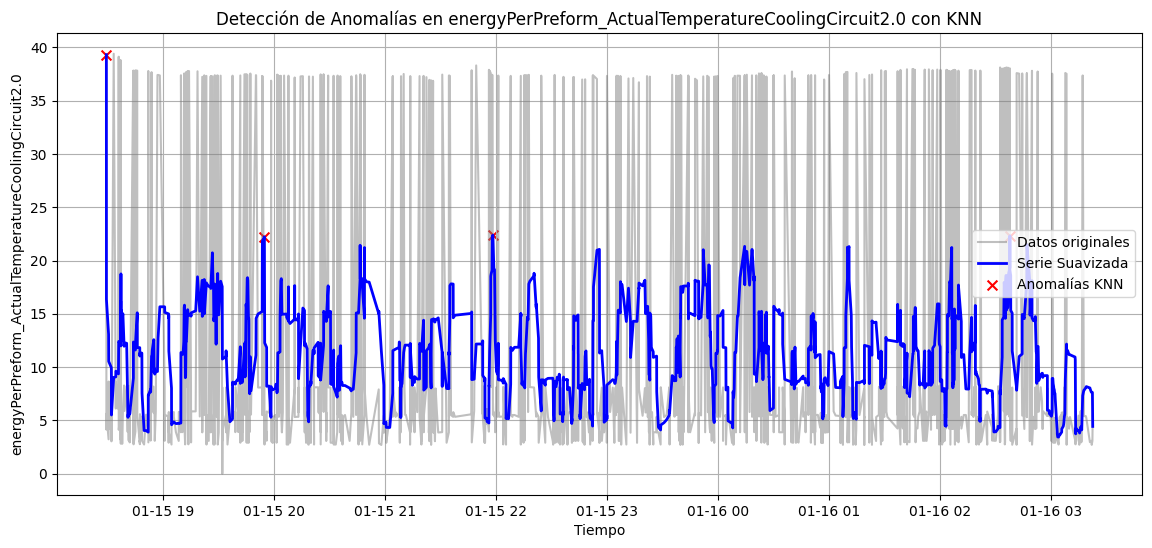


🔹 Analizando la columna: 'energyPerPreform_CurrentPreformNeckFinishTemperature.0'
Tamaño de X_knn antes de KNN: (1788, 1)
🔴 Se detectaron 5 anomalías en 'energyPerPreform_CurrentPreformNeckFinishTemperature.0' con KNN.


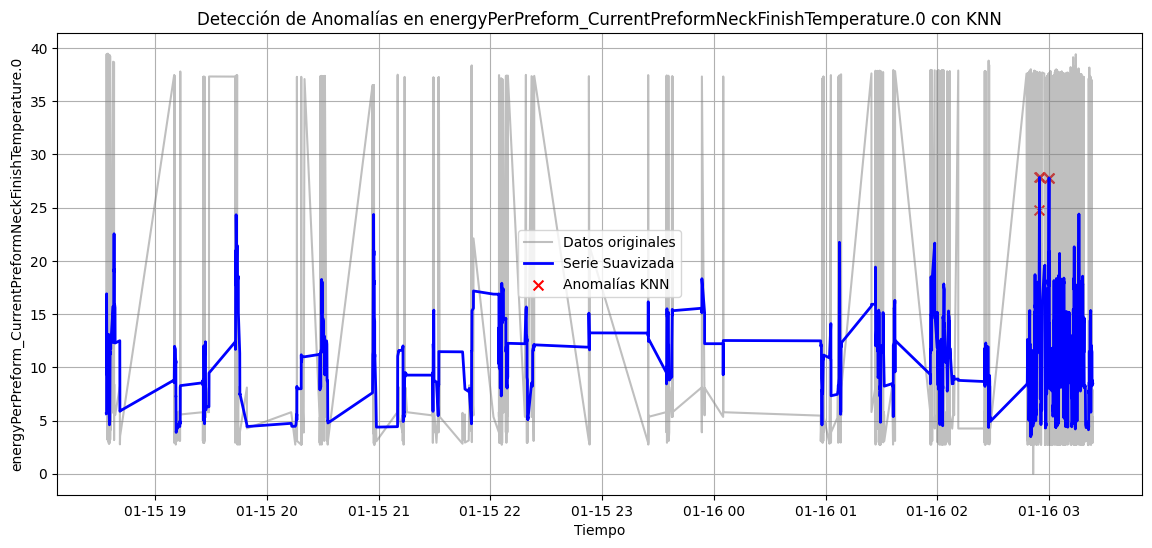


🔹 Analizando la columna: 'numberOfActivatedRadiators_ActualTemperatureCoolingCircuit2.0'
Tamaño de X_knn antes de KNN: (1301, 1)
🔴 Se detectaron 4 anomalías en 'numberOfActivatedRadiators_ActualTemperatureCoolingCircuit2.0' con KNN.


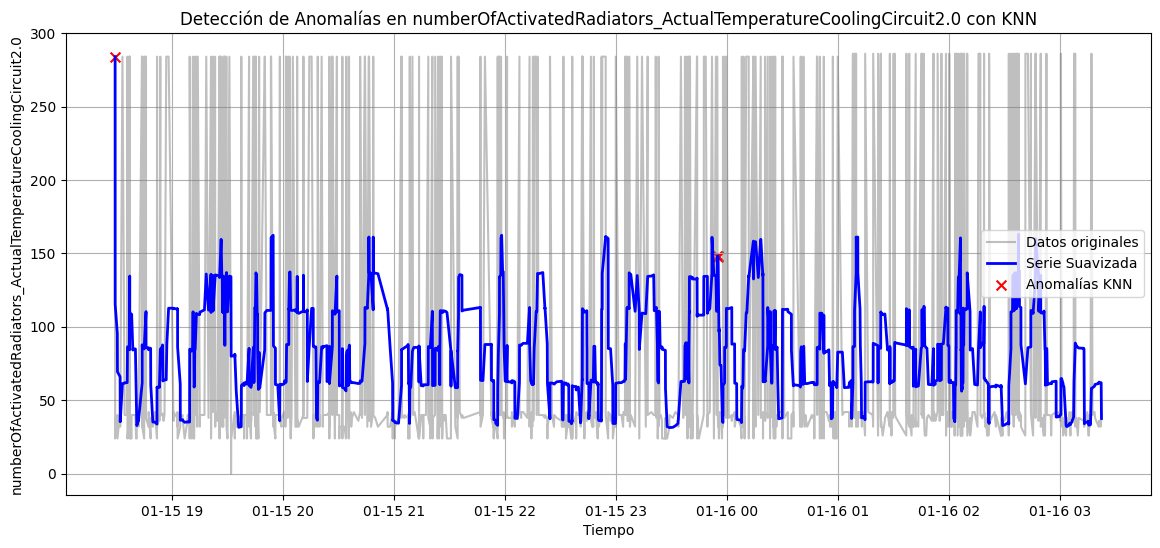


🔹 Analizando la columna: 'numberOfActivatedRadiators_CurrentPreformNeckFinishTemperature.0'
Tamaño de X_knn antes de KNN: (1788, 1)
🔴 Se detectaron 4 anomalías en 'numberOfActivatedRadiators_CurrentPreformNeckFinishTemperature.0' con KNN.


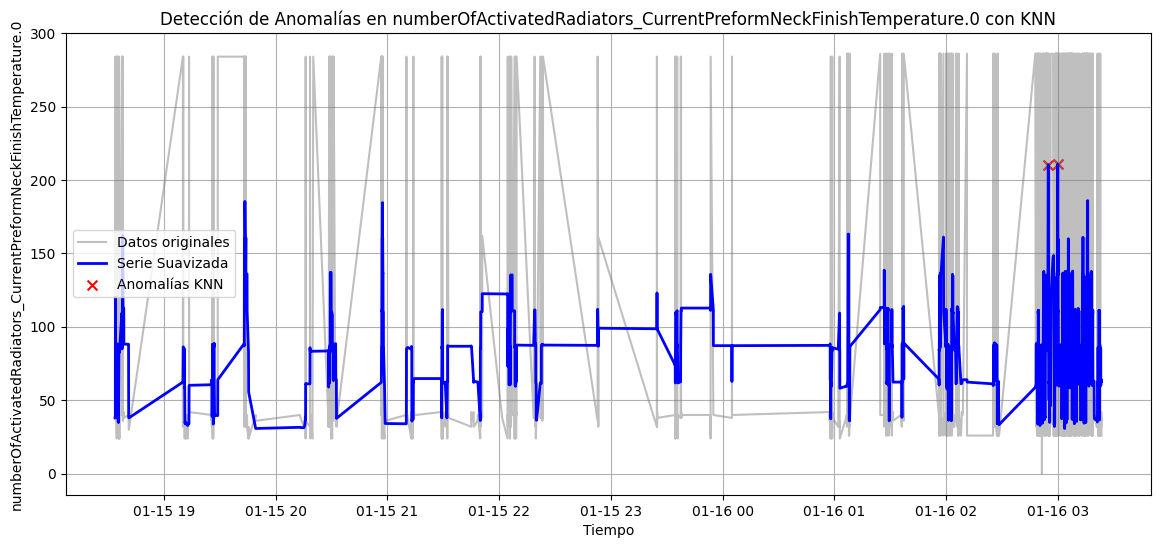


🔹 Analizando la columna: 'powerPerPreform_ActualTemperatureCoolingCircuit2.0'
Tamaño de X_knn antes de KNN: (1301, 1)
🔴 Se detectaron 4 anomalías en 'powerPerPreform_ActualTemperatureCoolingCircuit2.0' con KNN.


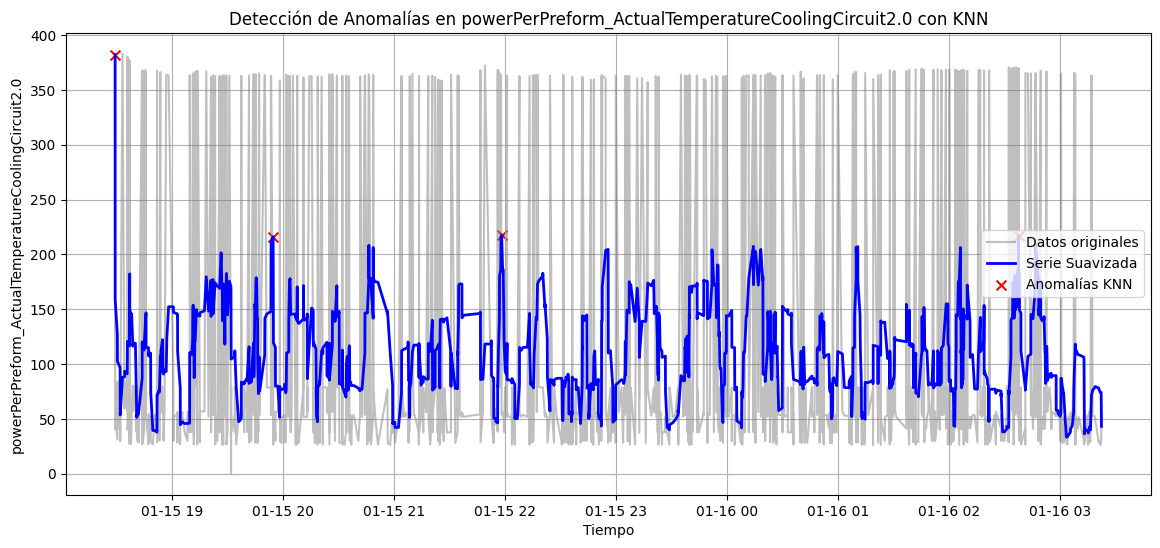


🔹 Analizando la columna: 'powerPerPreform_CurrentPreformNeckFinishTemperature.0'
Tamaño de X_knn antes de KNN: (1788, 1)
🔴 Se detectaron 5 anomalías en 'powerPerPreform_CurrentPreformNeckFinishTemperature.0' con KNN.


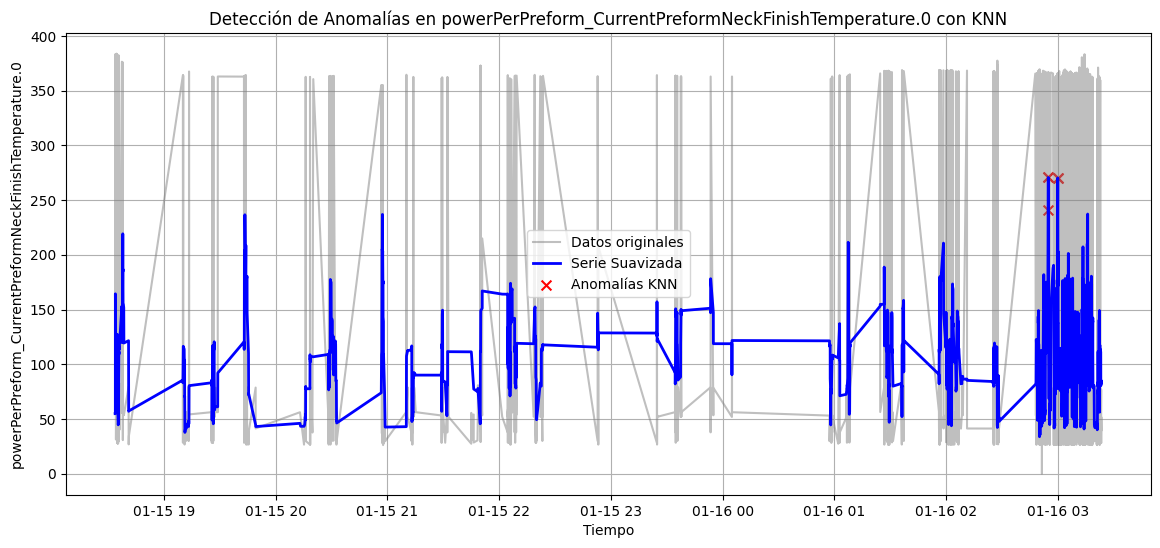


🔹 Analizando la columna: 'value_ActualTemperatureCoolingCircuit2.0'
Tamaño de X_knn antes de KNN: (5360, 1)
🔴 Se detectaron 12 anomalías en 'value_ActualTemperatureCoolingCircuit2.0' con KNN.


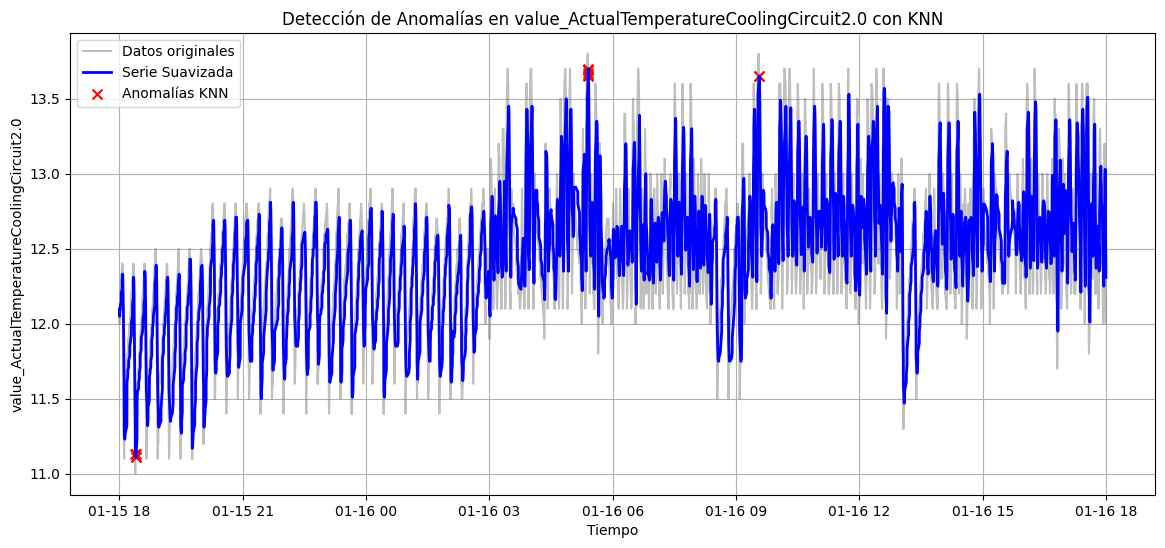


🔹 Analizando la columna: 'value_CurrentPreformNeckFinishTemperature.0'
Tamaño de X_knn antes de KNN: (33490, 1)
🔴 Se detectaron 49 anomalías en 'value_CurrentPreformNeckFinishTemperature.0' con KNN.


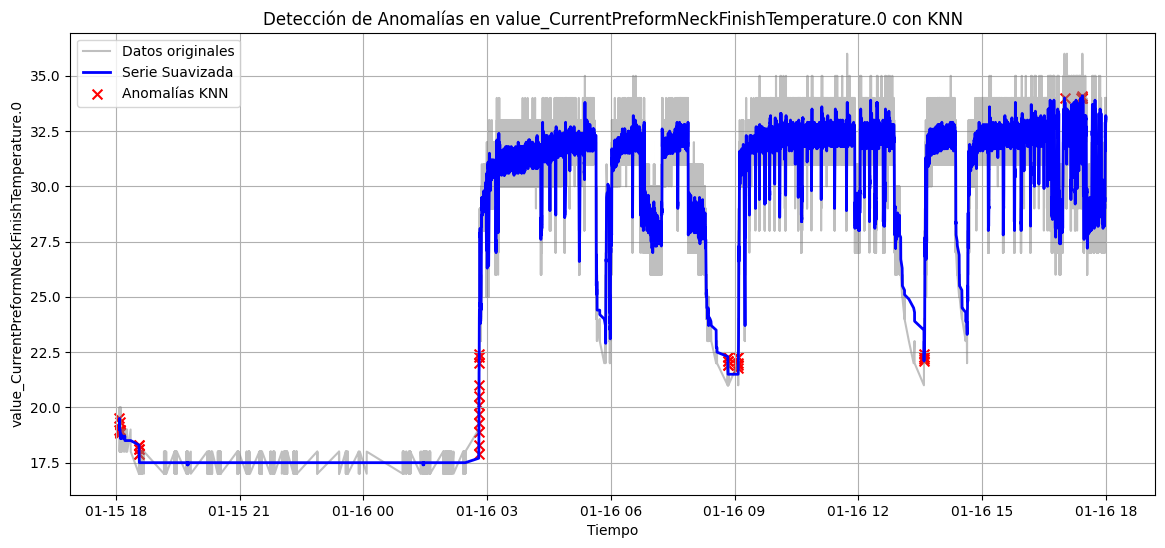


🔹 Analizando la columna: 'value_CurrentPreformTemperatureOvenInfeed.0'
Tamaño de X_knn antes de KNN: (8449, 1)
🔴 Se detectaron 16 anomalías en 'value_CurrentPreformTemperatureOvenInfeed.0' con KNN.


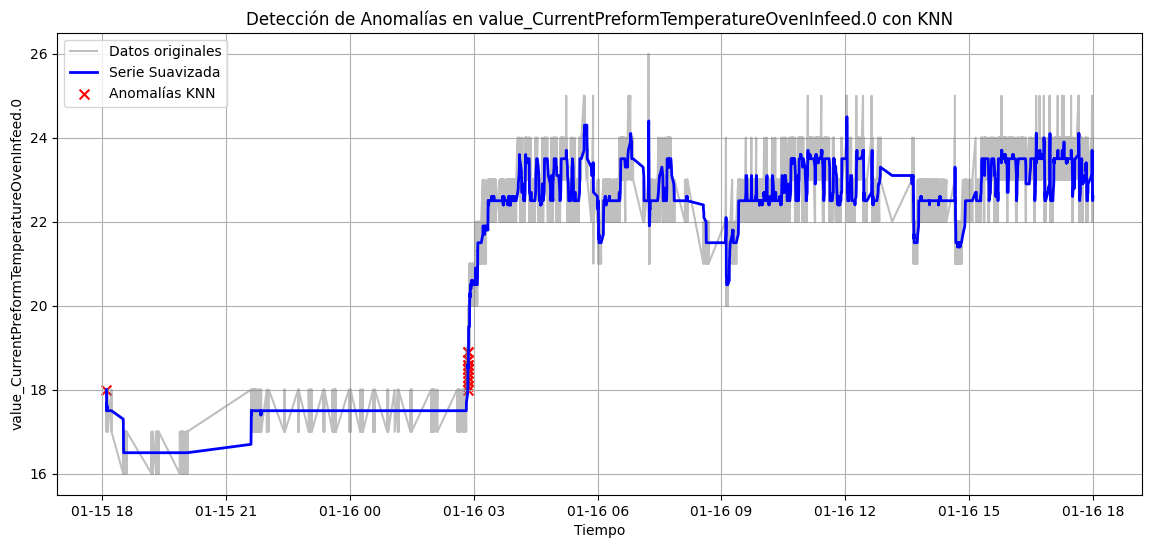


🔹 Analizando la columna: 'value_CurrentTemperatureBrake.1'
Tamaño de X_knn antes de KNN: (3869, 1)
🔴 Se detectaron 10 anomalías en 'value_CurrentTemperatureBrake.1' con KNN.


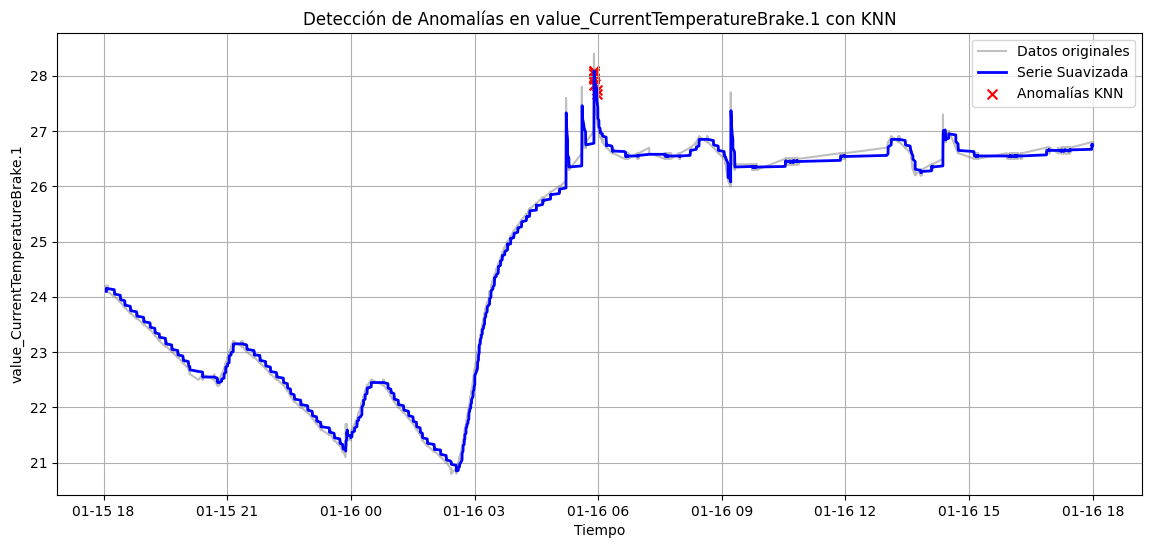


🔹 Analizando la columna: 'value_CurrentTemperatureBrake.2'
Tamaño de X_knn antes de KNN: (3546, 1)
🔴 Se detectaron 9 anomalías en 'value_CurrentTemperatureBrake.2' con KNN.


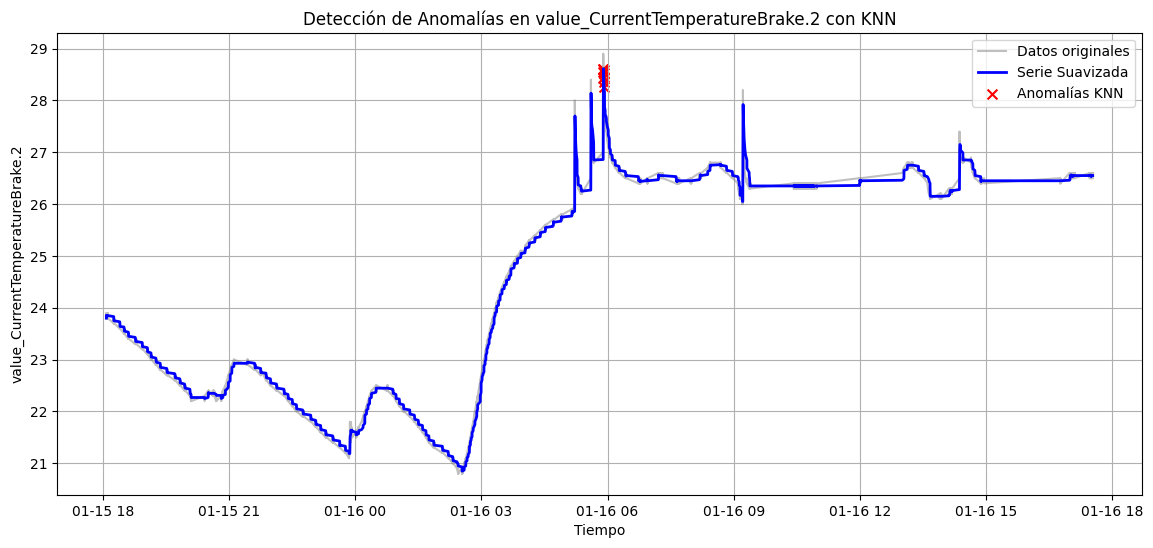


🔹 Analizando la columna: 'value_CurrentTemperaturePressureDewPoint.0'
Tamaño de X_knn antes de KNN: (2107, 1)
🔴 Se detectaron 6 anomalías en 'value_CurrentTemperaturePressureDewPoint.0' con KNN.


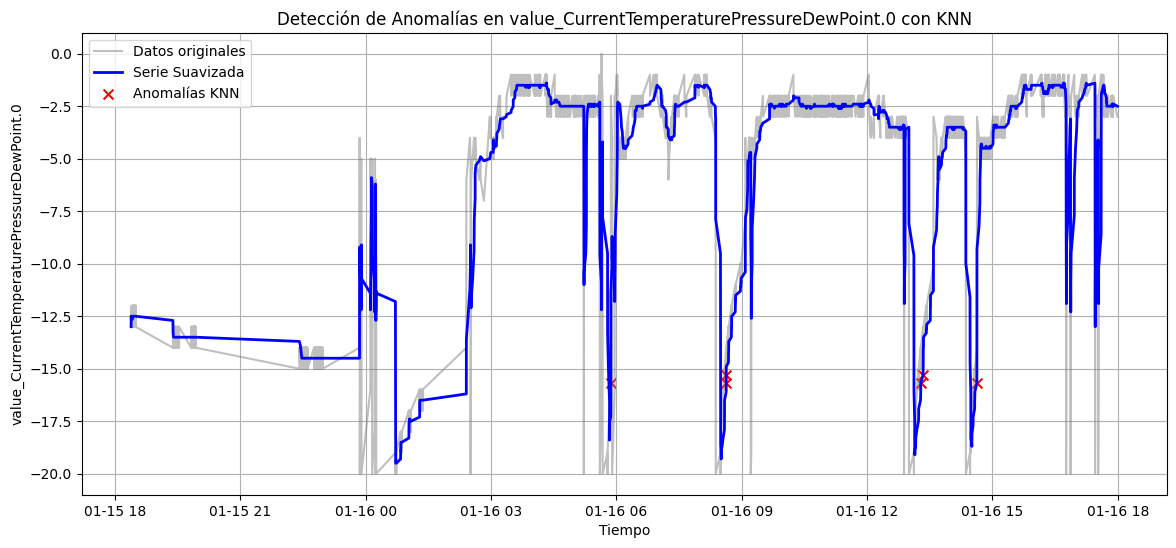


🔹 Analizando la columna: 'value_CurrentTemperatureRotaryJoint.0'
Tamaño de X_knn antes de KNN: (3624, 1)
🔴 Se detectaron 10 anomalías en 'value_CurrentTemperatureRotaryJoint.0' con KNN.


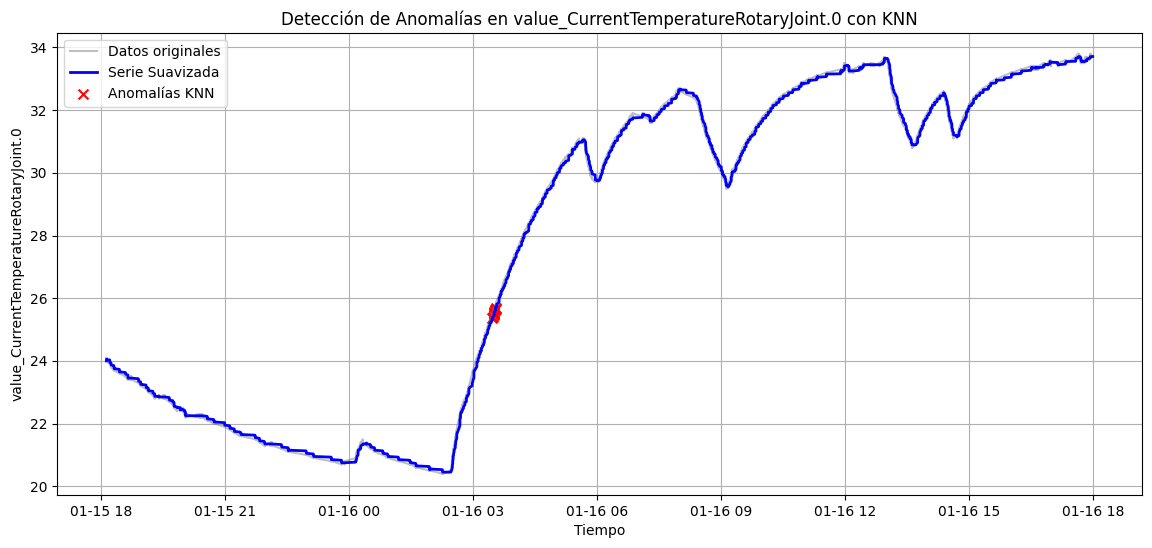


Anomalías (en más de 2 variables de temperatura):

🔍 **Coincidencias de Anomalías entre Variables**
🕒 2025-01-15 18:29:25+00:00: Anomalías en energyPerPreform_ActualTemperatureCoolingCircuit2.0, numberOfActivatedRadiators_ActualTemperatureCoolingCircuit2.0, powerPerPreform_ActualTemperatureCoolingCircuit2.0
🕒 2025-01-16 02:54:49+00:00: Anomalías en energyPerPreform_CurrentPreformNeckFinishTemperature.0, numberOfActivatedRadiators_CurrentPreformNeckFinishTemperature.0, powerPerPreform_CurrentPreformNeckFinishTemperature.0
🕒 2025-01-16 02:54:52+00:00: Anomalías en energyPerPreform_CurrentPreformNeckFinishTemperature.0, numberOfActivatedRadiators_CurrentPreformNeckFinishTemperature.0, powerPerPreform_CurrentPreformNeckFinishTemperature.0
🕒 2025-01-16 02:59:56+00:00: Anomalías en energyPerPreform_CurrentPreformNeckFinishTemperature.0, numberOfActivatedRadiators_CurrentPreformNeckFinishTemperature.0, powerPerPreform_CurrentPreformNeckFinishTemperature.0
🕒 2025-01-16 02:59:58+00:00: Anomalí

In [10]:
df_knn = df.copy()

# 🔹 Reemplazar valores no válidos por NaN
df_knn = df_knn.replace(["", "None", "NULL", "NaN", "nan"], np.nan)

# 🔹 Diccionario para guardar las anomalías por variable
anomalies_dict = {}

# 🔹 Seleccionar columnas que tengan datos válidos
columnas_con_datos = df_knn.dropna(axis=1, how="all").columns  

if len(columnas_con_datos) == 0:
    print("❌ ERROR: No hay ninguna columna con datos válidos en el DataFrame.")
else:
    for variable in columnas_con_datos:
        print(f"\n🔹 Analizando la columna: '{variable}'")

        # 🔹 Extraer la serie de tiempo sin NaNs
        df_var_knn = df_knn[[variable]].dropna()

        # ✅ Suavizamos la serie para evitar ruido extremo
        df_var_knn["smoothed"] = df_var_knn[variable].rolling(window=10, min_periods=1).mean()

        # 🔹 Aplicar KNN con la versión suavizada
        X_knn = df_var_knn["smoothed"].dropna().values.reshape(-1, 1)

        print(f"Tamaño de X_knn antes de KNN: {X_knn.shape}")

        if X_knn.shape[0] == 0:
            print(f"⚠️ La columna '{variable}' no tiene datos válidos después de dropna(). Saltando KNN.")
        else:
            clf = KNN(n_neighbors=20, contamination=0.0025, method="largest")  
            clf.fit(X_knn)
            df_var_knn["anomaly"] = clf.labels_

            # 🔹 Filtrar anomalías detectadas y guardarlas
            anomalies_knn = df_var_knn[df_var_knn["anomaly"] == 1]
            anomalies_dict[variable] = list(anomalies_knn.index)  # Guardamos los timestamps

            if anomalies_knn.empty:
                print(f"✅ No se detectaron anomalías en '{variable}' con KNN.")
            else:
                print(f"🔴 Se detectaron {len(anomalies_knn)} anomalías en '{variable}' con KNN.")
                
                # 📊 **Graficar**
                plt.figure(figsize=(14,6))
                plt.plot(df_var_knn.index, df_var_knn[variable], color="gray", alpha=0.5, label="Datos originales")
                plt.plot(df_var_knn.index, df_var_knn["smoothed"], color="blue", label="Serie Suavizada", linewidth=2)
                plt.scatter(anomalies_knn.index, anomalies_knn["smoothed"], color="red", marker="x", label="Anomalías KNN", s=50)
                plt.legend()
                plt.xlabel("Tiempo")
                plt.ylabel(variable)
                plt.title(f"Detección de Anomalías en {variable} con KNN")
                plt.grid()
                plt.show()

# 🔍 Coincidencias de Anomalías entre Variables

# Creamos un diccionario para mapear los timestamps donde hubo anomalías en múltiples variables
timestamps_anomalies = {}

# Recorremos el diccionario que guarda las anomalías por variable
for var, timestamps in anomalies_dict.items():
    for ts in timestamps:
        if ts not in timestamps_anomalies:
            timestamps_anomalies[ts] = []
        timestamps_anomalies[ts].append(var)

# 🔥 Imprimimos encabezado descriptivo
print("\nAnomalías (en más de 2 variables de temperatura):\n")
print("🔍 **Coincidencias de Anomalías entre Variables**")

# Mostramos solo los timestamps donde hubo más de 2 anomalías en simultáneo
for timestamp, variables in sorted(timestamps_anomalies.items()):
    if len(variables) > 2:  # Más de 2 variables con anomalía
        print(f"🕒 {timestamp}: Anomalías en {', '.join(variables)}")

# Crear un DataFrame para almacenar las anomalías individuales detectadas
anomalías_lista = []

# Recorremos el diccionario anomalies_dict para hacer la lista de todas las anomalías detectadas
for variable, timestamps in anomalies_dict.items():
    for ts in timestamps:
        if ts in df.index:  # Validación extra para asegurar que el timestamp esté en los datos originales
            anomalías_lista.append({
                "user_ts__": ts,
                "variable": variable,
                "valor": df.loc[ts, variable]  # Obtenemos el valor en el timestamp
            })

# Convertir la lista de anomalías a un DataFrame ordenado
df_anomalías = pd.DataFrame(anomalías_lista)

# Asegurar el tipo datetime y ordenar
df_anomalías["user_ts__"] = pd.to_datetime(df_anomalías["user_ts__"])
df_anomalías = df_anomalías.sort_values(by="user_ts__")

# Verificamos el resultado
print("\nPrimeras anomalías detectadas:")
print(df_anomalías.head())

# Guardamos las anomalías en un CSV
df_anomalías.to_csv("../data/anomalías_detectadas.csv", index=False)

# Contamos cuántas anomalías hubo por hora
df_anomalías["hora"] = df_anomalías["user_ts__"].dt.hour
print("\n🔢 Cantidad de anomalías detectadas por hora:")
print(df_anomalías["hora"].value_counts().sort_index())
